# Importation des librairies.

In [1]:
# Importation des librairies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

# Options d'affichage.
warnings.filterwarnings('ignore', category=UserWarning)
pd.set_option('display.max_columns', None)
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 1. Exploration et nettoyage des jeux de données.

## Importation des fichiers.

In [2]:
# Importation des fichiers.
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

# Création d'une copie dans un dataframe.
df_erp = erp.copy()
df_web = web.copy()
df_liaison = liaison.copy()

### 1.1 Fichier ERP

In [3]:
# Affichage des premières lignes et observation de la forme du dataframe.
print(df_erp.shape)
df_erp.head()

(825, 5)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
df_erp.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [5]:
# Vérification des types de données et de la présence de valeurs NaN.
df_erp.info()
df_erp.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [6]:
# Vérification des données contenues et de leur adéquation avec le datatype.
list(df_erp["onsale_web"].unique())

[1, 0]

In [7]:
# Vérification des données contenues et de leur adéquation avec le datatype.
list(df_erp["stock_status"].unique())

['outofstock', 'instock']

In [8]:
# Recherche de lignes dupliquées. 
df_erp.duplicated().sum()

0

In [9]:
# Recherche de doublons dans la colonne product_id pour tester son unicité.
df_erp.duplicated(subset=["product_id"]).sum()

0

#### Observations :

* La colonne **product_id** correspond aux références enregistrées dans l’ERP, on peut voir qu'il y a 825 références uniques.

* La colonne **product_id** ne contient pas de doublons ou de valeurs nulles. Nous pouvons donc l'utiliser comme **clé primaire** pour une jointure.

* Les colonnes **onsale_web** et **stock_status** devraient être de type **"category"**.


In [10]:
# Changement de type des colonnes.
df_erp = df_erp.astype({"onsale_web":"category", "stock_status":"category"})
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    category
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    category
dtypes: category(2), float64(1), int64(2)
memory usage: 21.3 KB


### 1.2 Fichier WEB

In [11]:
# Affichage des premières lignes.
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [12]:
# Vérification des types de données et de la présence de valeurs NaN.
df_web.info()
df_web.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [13]:
df_web.describe(include="all", datetime_is_numeric=True)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,1430,0.0,1430,716,1430,1430,1430,0.0,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,713,679,1,1,1,NaN,716,NaN,NaN,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,NaN,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,bon-cadeau-de-25-euros,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,NaN,NaN,4,12,1430,1430,1430,NaN,2,NaN,NaN,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,2018-08-22 03:22:17.090908928,2018-08-22 01:53:30.097902080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [14]:
# Recherche de lignes dupliquées. 
df_web.duplicated().sum()

82

#### Observations :

* Ce fichier contient les informations issues du CMS.

* Ce dataframe contient 1513 lignes pour 714 sku uniques contre 825 références uniques dans ERP et 28 colonnes.

* Le dataframe contient 82 lignes entièrement dupliquées.

* La colonne **"sku"** est une clé primaire candidate or elle contient 1428 valeurs dont 714 uniques :  elle contient aussi au moins une valeur non numériques et devrait être de type int64.

* La colonne **"sku"** contient 85 valeurs NaN il y a donc deux lignes qui n'ont pas de sku mais pour lesquelles les autres informations sont renseignées.

### Corrections :

Recherche et analyse des deux skus particulières.

Ces références n'ont pas de skus mais ont un nom de produit renseigné, nous pouvons donc filtrer selon ces critères.

In [15]:
df_web.query("sku.isnull() & ~post_title.isnull()")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Vérifions qu'il s'agisse bien de deux valeurs uniques.


In [16]:
df_web.query("post_title == 'Pierre Jean Villa Côte Rôtie Fongeant 2017' | post_title == 'Pierre Jean Villa Condrieu Jardin Suspendu 2018'")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Ces valeurs sont bien uniques, il ne s'agit pas de valeurs entrées en double. Nous ne pouvons pas retrouver leur skus, nous allons donc les supprimer.

Traitons les valeurs nulles :

In [17]:
# Elimination des valeurs nulles contenues dans dans la colonne 'sku'.
df_web = df_web.dropna(axis="index", subset=["sku"])

In [18]:
df_web.duplicated().sum()

0

Nous avons éliminé les lignes en double .

Vérifions si la colonne sku contient des doublons : 

In [19]:
print(f"La colonne 'sku' contient {df_web['sku'].count()} valeurs  dont {df_web['sku'].duplicated().sum()} valeurs uniques, soit le double.")

La colonne 'sku' contient 1428 valeurs  dont 714 valeurs uniques, soit le double.


La colonne **sku** contient 1428 valeurs dont 714 sont dupliquées.

 Partons du principe que toutes les lignes sont dupliquées, nous allons devoir analyser les colonnes pour trouver d'éventuelles différences.
 
 Vérifions notre hypothèse :

In [20]:
df_web.groupby("sku").agg({"sku" : "count"})

,sku
sku,
38,2
41,2
304,2
523,2
531,2
...,...
19820,2
19821,2
19822,2


In [21]:
# Affichage des premières lignes.
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On peut isoler une paire de valeurs doubles.

In [22]:
df_web.query("sku == 19814")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,NaN,publish,closed,closed,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Par souci de lisibilité et pour aider à notre analyse nous allons supprimer plusieurs colonnes selon différents critères : celles contenant uniquement des valeurs 0 et des NaN, et celles qui ne sont pas pertinentes.

**sku**, **total_sales**, **tax_status**, **guid**, **post_type**, **post_mime_type**, **post_title** sont conservées.

**post_author**, **post_date**, **post_date_gmt**, **post_excerpt**, **post_status**, **comment_status**, **ping_status**, **post_password**, **post_name**, **post_modified**, **post_modified_gmt** : 0 ou Nan.


**virtual**, **downloadable**, **rating_count**, **average_rating**, **tax_class**, **post_content_filtered**, **post_parent**, **comment_count**, **post_content**, **ping_status**, **menu_order** : pas pertinentes.

In [23]:
# Suppression des colonnes inutiles.
df_web = df_web.drop(columns=[ "tax_class", "post_content", "post_excerpt", "post_excerpt", "comment_status", "post_password", "post_content_filtered",
                               "virtual", "downloadable", "rating_count", "ping_status", "post_name", "average_rating", "post_content_filtered", 
                               "menu_order", "comment_count", "post_status", "post_author", "post_date_gmt", "post_date", "post_modified_gmt", 
                               "post_modified", "post_parent"]
        )


In [24]:
df_web.query("sku == 19814")

,sku,total_sales,tax_status,post_title,guid,post_type,post_mime_type
4,19814,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
802,19814,3.0,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg



* Ces deux entrées semblent correspondre au même produit.

* On peut observer que les lignes de type "**product**" sont taxables.

* Les lignes de type "**attachement**" ne sont pas taxables et ont un type de poste image.

* Vérifions si nous avons réellement le même nombre de références de type "**product**" et de type "**attachement**".


In [25]:
# Affichage des entrées de type product. 
df_web.query("post_type == 'product'")

,sku,total_sales,tax_status,post_title,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.0,taxable,Bon cadeau de 25€,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1,15298,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
2,15296,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,15300,0.0,taxable,Pierre Jean Villa Crozes-Hermitage Accroche Co...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,19814,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
...,...,...,...,...,...,...,...
762,16135,5.0,taxable,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
767,15891,0.0,taxable,Camin Larredya Jurançon Sec La Virada 2018,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
768,15887,0.0,taxable,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
797,13127-1,0.0,taxable,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [26]:
# Affichage des entrées de type attachement.
df_web.query("post_type == 'attachment'")

,sku,total_sales,tax_status,post_title,guid,post_type,post_mime_type
799,15298,6.0,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
800,15296,0.0,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
801,15300,0.0,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
802,19814,3.0,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
803,19815,0.0,NaN,Pierre Jean Villa Côte Rôtie Carmina 2017,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
...,...,...,...,...,...,...,...
1508,16135,5.0,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1509,15891,0.0,NaN,Camin Larredya Jurançon Sec La Virada 2018,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1510,15887,0.0,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1511,13127-1,0.0,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


Notre intuition est confirmée, à chaque mise en ligne de produits, deux lignes apparaissent dans le CMS.
L'une d'entre elles contient les informations relatives à l'image du produit et l'autre au produit lui-même, c'est donc cette dernière que nous allons garder.
Nous allons donc uniquement garder les posts de type product.


Nous n'avons plus besoin des colonnes suivantes : **tax_status**, **guid**, **post_type**, **post_mime_type**, nous allons donc les supprimer.

In [27]:
df_web = (df_web.query("post_type == 'product'")
                .drop(columns=[ "tax_status", "guid", "post_type", "post_mime_type" ])
                .copy())

In [28]:
df_web

,sku,total_sales,post_title
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
...,...,...,...
762,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015
767,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018
768,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
797,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


In [29]:
df_web.isna().sum()

sku            0
total_sales    0
post_title     0
dtype: int64

Plus de doublons ou de valeurs nulles dans ce dataframe.

Le cas des valeurs non numériques.

In [30]:
df_web.query("sku.str.isnumeric() == False")

,sku,total_sales,post_title
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€
797,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


Pour savoir comment gérer ces 2 valeurs nous devons d'abord analyser le dernier dataset.

### 1.3 Fichier LIAISON

In [31]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [32]:
df_liaison.info()
df_liaison.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


product_id     0
id_web        91
dtype: int64

In [33]:
df_liaison.duplicated().sum()

0

In [34]:
df_liaison.describe(include="all")

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [35]:
df_liaison.duplicated(subset=["product_id"]).sum()

0

#### Observations :

* Ce fichier contient les **product_id** qui correspondent aux **product_id** enregistrés dans l’ERP et les **id_web** qu'il faut renommer en 'sku' pour correspondre aux **sku** de la table web.

* Ce fichier va nous servir pour faire la jointure entre les différentes tables.

* **product_id** contient 825 valeurs uniques qui représentent 825 références, ce qui est cohérent avec la table ERP

* **id_web** contient 91 valeurs nulles, c'est à dire qu'il manque les références web pour ces 91 références présentent dans l’ERP, nous allons les supprimmer.

* De plus on constate qu'elle contient 734 valeurs contre 714 dans la table web.

* la colonne **sku** est de type object tout comme la colonne **sku** de la table web vérifiez donc si elle contient aussi les mêmes valeurs non numériques.


On renomme la colonne pour correspondre à celle de la table web.

In [36]:
df_liaison = (df_liaison.rename(columns = {'id_web' : 'sku'}).copy())

In [37]:
# Suppression des skus nulles.
df_liaison = df_liaison.dropna(subset=["sku"])

In [38]:
df_liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


Affichons les valeurs non numériques.

In [39]:
df_liaison.query("sku.str.isnumeric() == False")

,product_id,sku
443,4954,bon-cadeau-25-euros
822,7247,13127-1
823,7329,14680-1


Elle contient en effet les mêmes valeurs non numériques que le dataframe web plus une autre valeur.

Nous pouvons leur attribuer un sku unique à condition qu'il n'existe pas déjà dans les différentes tables. Nous allons donc les traiter une par une.


Vérifions l'existence de **"bon-cadeau-25-euros"** dans le dataframe ERP en utilisant son **"product_id"**.

In [40]:
df_erp.query("product_id ==4954")

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


Confirmons la présence de **"bon-cadeau-25-euros"** dans le dataframe web.

In [41]:
df_web.query("sku == 'bon-cadeau-25-euros'")

,sku,total_sales,post_title
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€


Attribuons-lui un sku qui n'existe pas dans les 2 tables.

In [42]:
df_web.query("sku == 10")

,sku,total_sales,post_title


In [43]:
df_liaison.query("sku == 10")

,product_id,sku


Le sku 10 est disponible.

In [44]:
df_web = df_web.replace("bon-cadeau-25-euros", 10)

df_liaison = df_liaison.replace("bon-cadeau-25-euros", 10)

2nde valeur non numérique.

In [45]:
df_liaison.query("sku.str.isnumeric() == False")

,product_id,sku
822,7247,13127-1
823,7329,14680-1


Vérifions son existence dans les 3 dataframes en utilisant son **sku** et son **"product_id"**.

In [46]:
df_liaison.query("sku == '14680-1' | sku == 14680")

,product_id,sku
363,4757,14680
823,7329,14680-1


Je ne peux pas lui attribuer le sku 14680 puisqu'il existe déjà.

In [47]:
df_erp.query("product_id == 7329 | product_id == 4757")


,product_id,onsale_web,price,stock_quantity,stock_status
363,4757,1,26.5,1,instock
823,7329,0,26.5,14,instock


In [48]:
df_web.query("sku == '14680-1' | sku == 14680")

,sku,total_sales,post_title
354,14680,6.0,Domaine Saint-Nicolas Fiefs Vendéens Blanc Le ...


En utilisant les **"product_id"** on peut voir que ces 2 produits ont le même prix mais qu’ils diffèrent dans leur quantité en stock et leur présence sur le site web. 

Du fait de cette ambiguïté nous allons attribuer un nouveau **sku**.

In [49]:
df_liaison.query("sku == 14681")

,product_id,sku


In [50]:
df_liaison = df_liaison.replace("14680-1", 14681)

3e valeur non numérique. 

In [51]:
df_liaison.query("sku.str.isnumeric() == False")

,product_id,sku
822,7247,13127-1


Vérifions son existence dans les 3 dataframes en utilisant son **sku** et son **"product_id"**.

In [52]:
df_liaison.query("sku == 13127 or sku =='13127-1'")

,product_id,sku
17,4053,13127
822,7247,13127-1


Je ne peux pas lui attribuer le sku 13127 puisqu'il existe déjà.

Retrouvons ces 2 skus dans la table web. 

In [53]:
df_web.query("sku == 13127 or sku =='13127-1'")

,sku,total_sales,post_title
18,13127,23.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2012
797,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


Confirmons qu'il s’agit de 2 produits différents dans la table ERP.

In [54]:
df_erp.query("product_id == 4053 or product_id ==7247")

,product_id,onsale_web,price,stock_quantity,stock_status
17,4053,1,44.3,16,instock
822,7247,1,54.8,23,instock


Ces 2 produits sont différents il nous faut donc trouver un nouveau SKU.

Vérification de l'existence du produit grâce à son nom dans la table web.

In [55]:
df_web.query("post_title =='Clos du Mont-Olivet Châteauneuf-du-Pape 2007'")

,sku,total_sales,post_title
493,16034,3.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
797,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


On voit que le même produit est enregistré deux fois avec des skus différents.

Confirmons qu'il s'agit bien du même produit.

In [56]:
df_liaison.query("sku == 16034")

,product_id,sku
509,5465,16034


In [57]:
df_liaison.query("product_id == 5465 or product_id ==7247")

,product_id,sku
509,5465,16034
822,7247,13127-1


En analysant cette entrée de plus près nous nous apercevons que nous avons ici bien affaire un produit qui est enregistré deux fois avec un sku différent nous allons donc fusionner ces deux entrées.

In [58]:
df_erp.query("product_id == 5465").replace(12, 35)

,product_id,onsale_web,price,stock_quantity,stock_status
509,5465,1,54.8,35,instock


In [59]:
df_erp = df_erp.drop(df_erp.index[(df_erp["product_id"] == 7247)]).copy()
df_liaison = df_liaison.drop(df_liaison.index[(df_liaison["sku"] == "13127-1")]).copy()
df_web = df_web.drop(df_web.index[(df_web["sku"] == "13127-1")]).copy()

Après l'élimination des doublons, des valeurs nulles et des valeurs non numériques nous pouvons procéder au changement de type des colonnes.

In [60]:
df_erp.dtypes

product_id           int64
onsale_web        category
price              float64
stock_quantity       int64
stock_status      category
dtype: object

In [61]:
df_liaison.dtypes

product_id     int64
sku           object
dtype: object

In [62]:
df_liaison["sku"].astype("Int64")

0      15298
1      15296
2      15300
3      19814
4      19815
       ...  
787    16135
792    15891
793    15887
823    14681
824    16230
Name: sku, Length: 733, dtype: Int64

In [63]:
df_web.dtypes

sku             object
total_sales    float64
post_title      object
dtype: object

In [64]:
df_web["total_sales"].astype("Int64")
df_web["sku"].astype("Int64")

0         10
1      15298
2      15296
3      15300
4      19814
       ...  
761    15741
762    16135
767    15891
768    15887
798    16230
Name: sku, Length: 713, dtype: Int64

# 2. MISSION

##  2.1. Rapprochement des exports

In [65]:
print(f"Le Dataframe erp est de taille : {df_erp.shape}\nLe Dataframe liaison est de taille : {df_liaison.shape}\nLe Dataframe web est de taille : {df_web.shape}")

Le Dataframe erp est de taille : (824, 5)
Le Dataframe liaison est de taille : (733, 2)
Le Dataframe web est de taille : (713, 3)


In [66]:
# Réalisation d'une jointure entre ERP et liaison. L'option indicator va nous permettre ensuite d'analyser les résultats de cette jointure.
df_erpliaison = pd.merge(df_erp, df_liaison, how="inner", indicator="Jointure")

# On renomme de manière plus explicite les résultats de l'option indicator.
expl = {"left_only": "Present dans ERP uniquement", "right_only": "Present dans liaison uniquement", "both": "Present dans ERP et liaison"}

df_erpliaison["Jointure"] = df_erpliaison["Jointure"].map(expl)

In [67]:
df_erpliaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,Jointure
0,3847,1,24.2,0,outofstock,15298,Present dans ERP et liaison
1,3849,1,34.3,0,outofstock,15296,Present dans ERP et liaison
2,3850,1,20.8,0,outofstock,15300,Present dans ERP et liaison
3,4032,1,14.1,0,outofstock,19814,Present dans ERP et liaison
4,4039,1,46.0,0,outofstock,19815,Present dans ERP et liaison
...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,Present dans ERP et liaison
729,7023,1,27.5,15,instock,15891,Present dans ERP et liaison
730,7025,1,69.0,2,instock,15887,Present dans ERP et liaison
731,7329,0,26.5,14,instock,14681,Present dans ERP et liaison


In [68]:
df_erpliaison["Jointure"].value_counts()

Present dans ERP et liaison        733
Present dans ERP uniquement          0
Present dans liaison uniquement      0
Name: Jointure, dtype: int64

Jointure réussie avec toutes les clés qui ont jointé.

In [69]:
df_central = pd.merge(df_erpliaison, df_web,how="outer",  on="sku", indicator="joint")
d={"left_only":"Present dans ERP uniquement", "right_only":"Present sur le web uniquement","both":"Present dans ERP et sur le web"}

df_central['joint'] = df_central['joint'].map(d)

In [70]:
df_central

,product_id,onsale_web,price,stock_quantity,stock_status,sku,Jointure,total_sales,post_title,joint
0,3847,1,24.2,0,outofstock,15298,Present dans ERP et liaison,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,Present dans ERP et sur le web
1,3849,1,34.3,0,outofstock,15296,Present dans ERP et liaison,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Present dans ERP et sur le web
2,3850,1,20.8,0,outofstock,15300,Present dans ERP et liaison,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,Present dans ERP et sur le web
3,4032,1,14.1,0,outofstock,19814,Present dans ERP et liaison,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Present dans ERP et sur le web
4,4039,1,46.0,0,outofstock,19815,Present dans ERP et liaison,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Present dans ERP et sur le web
...,...,...,...,...,...,...,...,...,...,...
728,6930,1,8.4,83,instock,16135,Present dans ERP et liaison,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Present dans ERP et sur le web
729,7023,1,27.5,15,instock,15891,Present dans ERP et liaison,0.0,Camin Larredya Jurançon Sec La Virada 2018,Present dans ERP et sur le web
730,7025,1,69.0,2,instock,15887,Present dans ERP et liaison,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,Present dans ERP et sur le web
731,7329,0,26.5,14,instock,14681,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement


In [71]:
df_central["joint"].value_counts()

Present dans ERP et sur le web    713
Present dans ERP uniquement        20
Present sur le web uniquement       0
Name: joint, dtype: int64

Une jointure avec 20 valeurs qui ont jointé à gauche uniquement.

C'est-à-dire que ces valeurs ont un sku mais ne sont pas présentes sur le site web, confirmons cela.


In [72]:
df_central.query("joint == 'Present dans ERP uniquement'")

,product_id,onsale_web,price,stock_quantity,stock_status,sku,Jointure,total_sales,post_title,joint
185,4289,0,22.8,0,outofstock,13771,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
227,4568,0,21.5,0,outofstock,15065,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
230,4584,0,32.3,0,outofstock,14785,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
334,4741,0,12.4,0,outofstock,12601,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
368,4864,0,8.3,0,outofstock,15154,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
371,4869,0,17.2,0,outofstock,14360,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
399,4921,0,13.8,0,outofstock,15608,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
400,4922,0,21.5,0,outofstock,15586,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
443,5018,0,15.4,0,outofstock,15272,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement
445,5021,0,17.1,0,outofstock,15630,Present dans ERP et liaison,NaN,NaN,Present dans ERP uniquement


Il y a en effet 20 références qui sont présentes dans l’ERP et dans le fichier liaison mais qui ne sont pas en vente sur le site malgré qu’un sku leur soit attribué.

Parmi ces références seule deux sont en stock, il pourrait s'agir de produits qui seront bientôt mis en vente.

Nous pouvons donc exclure ces valeurs de notre dataframe final.

##  2.2. Chiffre d’affaires par produit

Création d'un dataframe final contenant uniquement les références présentes dans l’ERP et sur le site web.

In [73]:
df_central_online = (df_central[['product_id','sku', 'post_title', 'stock_quantity', 'price', 'stock_status', 'total_sales', 'onsale_web']]
                    .query("onsale_web == 1")
                    .copy()
                )

In [74]:
# Ajout d'une colonne pour effectuer le calcul du chiffre d’affaires par produit.
df_central_online["CA_produit"] = df_central_online["price"]*df_central_online["total_sales"]

La liste des 20 références ayant un chiffre d'affaires par produit le plus élevé.

In [75]:
df_central_online.sort_values(by="CA_produit", ascending=False).head(20)

,product_id,sku,post_title,stock_quantity,price,stock_status,total_sales,onsale_web,CA_produit
195,4334,7818,Champagne Gosset Grand Blanc de Blancs,0,49.0,outofstock,96.0,1,4704.0
71,4144,1662,Champagne Gosset Grand Rosé,11,49.0,instock,87.0,1,4263.0
219,4402,3510,Cognac Frapin VIP XO,8,176.0,instock,13.0,1,2288.0
70,4142,11641,Champagne Gosset Grand Millésime 2006,8,53.0,instock,30.0,1,1590.0
69,4141,304,Champagne Gosset Grande Réserve,1,39.0,instock,40.0,1,1560.0
202,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2,126.5,instock,11.0,1,1391.5
200,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,0,225.0,outofstock,5.0,1,1125.0
79,4153,16237,Elian Daros Côtes du Marmandais Clos Baquey 2015,0,29.0,outofstock,36.0,1,1044.0
670,6206,16580,Domaine Giudicelli Patrimonio Blanc 2019,120,25.2,instock,41.0,1,1033.2
30,4068,16416,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,157,16.6,instock,62.0,1,1029.2


##  2.3. Chiffre d’affaires total réalisé en ligne

In [76]:
total_online = round(df_central_online["CA_produit"].sum(),2)

print(f"Le chiffre d’affaires total réalisé en ligne est de : {total_online} €")

Le chiffre d’affaires total réalisé en ligne est de : 70568.6 €


 # 3. Zoom sur la variable prix.

 ## 3.1.	Analyse univariée.

### 3.1.1.	Mesures de tendance centrale.

In [77]:
print(f"La moyenne est : {round(df_central_online['price'].mean(),2)}")
print(f"La médiane est : {round(df_central_online['price'].median(),2)}")
print(f"Le mode est : {df_central_online['price'].mode().to_dict()[0]}")

La moyenne est : 32.46
La médiane est : 23.5
Le mode est : 19.0


### 3.1.2.	Mesures de dispersion.

In [78]:
print(f"La variance est de : {round(df_central_online['price'].var(),2)}")
print(f"L'écart-type est de : {round(df_central_online['price'].std(),2)}")

La variance est de : 773.81
L'écart-type est de : 27.82


### 3.1.3.	Mesures de forme.

In [79]:
print(f"Le skewness est de : {round(df_central_online['price'].skew(),2)}")
print(f"Le kurtosis est de : {round(df_central_online['price'].kurtosis(),2)}")

Le skewness est de : 2.59
Le kurtosis est de : 10.1


Observons ces différentes données sur un histogramme.

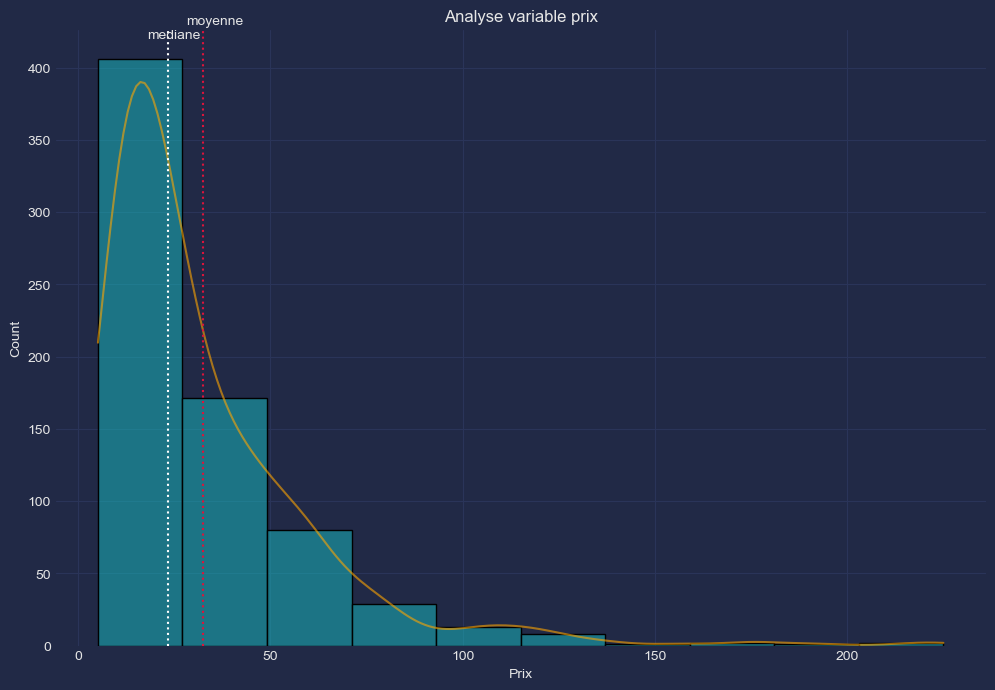

In [80]:
plt.figure(figsize=(12,8))
ax = sns.histplot(df_central_online["price"], bins= 10, kde=True)
ax.set(title = "Analyse variable prix",xlabel= "Prix")
ax.lines[0].set(color="orange", alpha=0.6)
ax.axvline(df_central_online["price"].mean(), color="crimson",linestyle="dotted", label="mean")
ax.annotate("moyenne", xy=(2, 1), xytext=(28, 430))
ax.annotate("mediane", xy=(2, 1), xytext=(18, 420))
plt.axvline(df_central_online["price"].median(), color="white",linestyle="dotted", label="median")
plt.show()

Nous avons bien ici affaire à une distribution étalée vers la droite, avec des valeurs concentrées autour de la médiane, et des valeurs qui s'en éloigne beaucoup vers le haut.




## 3.2.	Détection de valeurs aberrantes.

### 3.2.1	La boîte à moustaches (boxplot)

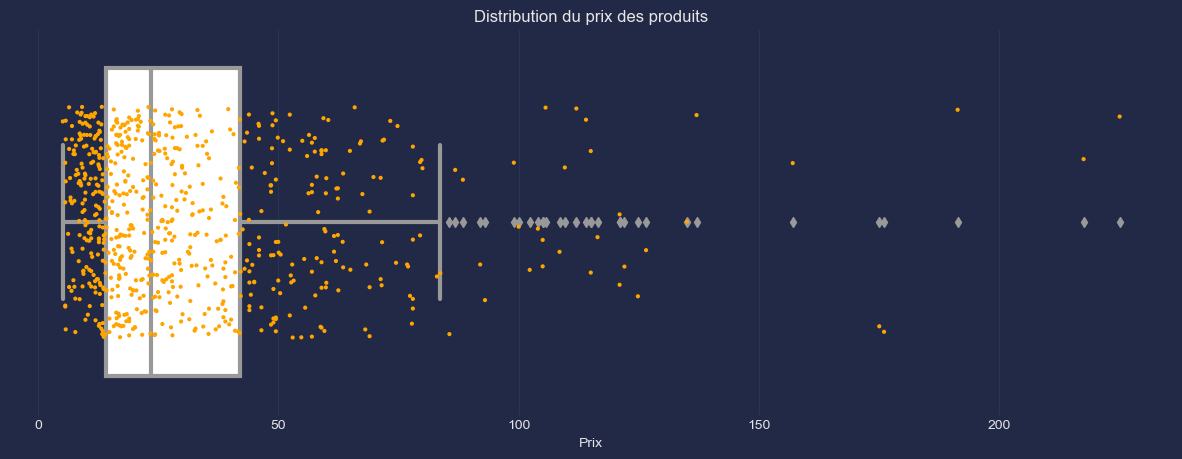

In [81]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(x="price", data=df_central_online, linewidth=3, color="white")
ax = sns.stripplot(x="price", data=df_central_online, color="orange", jitter=0.3, size=3 )
ax.set(title = "Distribution du prix des produits",xlabel= "Prix")
plt.show()


Ce boxplot nous permet ici de bien visualiser les valeurs très hautes et la concentration autour de la médiane.

Nous avons plusieurs méthodes qui vont nous permettre de déterminer ces valeurs de manière plus précise et de les lister.


### 3.2.2	Méthode IQR

Pour la méthode des écarts interquartiles nous devons d'abord calculer nos premiers et troisièmes quartiles afin de déterminer les valeurs bornes en dehors desquelles nous pouvons considérer que le prix est un outlier. 

In [82]:
iqr = round(stats.iqr(df_central_online["price"]), 2)
q3 = round(np.percentile(df_central_online["price"], 75), 2)
q1 = round(np.percentile(df_central_online["price"], 25), 2)

borne_haut = 1.5 * iqr + q3

borne_bas = 1.5 * iqr - q1

print(f"Le prix est considéré comme outlier si il est en dessous de {borne_bas}€ ou au-dessus de {borne_haut}€.")

Le prix est considéré comme outlier si il est en dessous de 27.9€ ou au-dessus de 84.1€.


Création d'un dataframe regroupant les outliers détectés grâce à la méthode des interquartiles.

In [83]:
df_outlier = df_central_online.query("@borne_bas < price > @borne_haut").sort_values(by="price")

In [84]:
df_outlier

,product_id,sku,post_title,stock_quantity,price,stock_status,total_sales,onsale_web,CA_produit
206,4359,13853,Champagne Larmandier-Bernier Grand Cru Les Che...,0,85.6,outofstock,1.0,1,85.6
448,5026,13913,Champagne Agrapart &amp; Fils Minéral Extra Br...,2,86.8,instock,0.0,1,0.0
65,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,5,88.4,instock,0.0,1,0.0
514,5565,19822,Tempier Bandol Cabassaou 2017,0,92.0,outofstock,0.0,1,0.0
616,5916,14774,Wemyss Malts Single Cask Scotch Whisky Chocola...,3,93.0,instock,0.0,1,0.0
674,6214,11601,Domaine des Comtes Lafon Volnay 1er Cru Champa...,7,99.0,instock,0.0,1,0.0
63,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,11,100.0,instock,0.0,1,0.0
386,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,20,102.3,instock,0.0,1,0.0
223,4407,3509,Cognac Frapin Cigar Blend,6,104.0,instock,1.0,1,104.0
440,5008,11602,Domaine des Comtes Lafon Volnay 1er Cru Santen...,10,105.0,instock,0.0,1,0.0


On peut voir dans ce dataframe qui regroupe toutes ces valeurs aberrantes quelles sont toutes vers le haut.

Nous allons les stocker dans une liste.


In [85]:
liste_outlier = list(df_outlier["post_title"].values)
liste_outlier

["Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011",
 'Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012',
 'Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012',
 'Tempier Bandol Cabassaou 2017',
 'Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde',
 'Domaine des Comtes Lafon Volnay 1er Cru Champans 2013',
 'Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017',
 'Domaine Des Croix Corton Grand Cru Les Grèves 2017',
 'Cognac Frapin Cigar Blend',
 'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2013',
 'Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2014',
 'David Duband Chambolle-Musigny 1er Cru Les Sentiers 2016',
 'Cognac Frapin Château de Fontpinot XO',
 'Château de Meursault Puligny-Montrachet 1er Cru Champ Canet 2014',
 "Champagne Agrapart &amp; Fils L'Avizoise Extra Brut Blanc de Blancs Grand Cru 2012",
 'Wemyss Malts Single Cask Scotch Whis

In [86]:
df_outlier.describe()

,product_id,stock_quantity,price,total_sales,CA_produit
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5267.937500,7.250000,124.571875,1.406250,217.812500
std,766.699964,5.588006,36.068727,3.109397,505.080853
min,4115.000000,0.000000,85.600000,0.000000,0.000000
25%,4406.750000,2.750000,103.575000,0.000000,0.000000
50%,5025.500000,7.000000,114.500000,0.000000,0.000000
75%,5970.000000,10.250000,128.625000,1.250000,132.250000
max,6216.000000,20.000000,225.000000,13.000000,2288.000000


In [87]:
prop_ventes_outlier = round(df_outlier["total_sales"].sum()/df_central_online["total_sales"].sum()*100,2)

prop_stock_outlier = round(df_outlier["stock_quantity"].sum()/df_central_online["stock_quantity"].sum()*100,2)

prop_outlier = round(df_outlier["CA_produit"].sum()/total_online*100,2)


print(f"La méthode des écarts interquartile révèle {df_outlier['product_id'].count()} valeurs aberrantes, elles représentent {prop_ventes_outlier}% des ventes\
 soit {prop_outlier}% du chiffre d'affaires.")

La méthode des écarts interquartile révèle 32 valeurs aberrantes, elles représentent 1.57% des ventes soit 9.88% du chiffre d'affaires.


### 3.2.3 Méthode Z-score

La 2nde méthode est celle du z-score qui va nous permettre de voir les différents prix selon leur relation à la moyenne et à l'écart-type de notre distribution.

On ajoute donc une colonne pour calculer ce score.

In [88]:
df_central_online['z_score'] =(df_central_online["price"] - df_central_online["price"].mean())/df_central_online["price"].std()

In [89]:
df_central_online

,product_id,sku,post_title,stock_quantity,price,stock_status,total_sales,onsale_web,CA_produit,z_score
0,3847,15298,Pierre Jean Villa Saint-Joseph Préface 2018,0,24.2,outofstock,6.0,1,145.2,-0.297002
1,3849,15296,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0,34.3,outofstock,0.0,1,0.0,0.066079
2,3850,15300,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0,20.8,outofstock,0.0,1,0.0,-0.419228
3,4032,19814,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,0,14.1,outofstock,3.0,1,42.3,-0.660083
4,4039,19815,Pierre Jean Villa Côte Rôtie Carmina 2017,0,46.0,outofstock,0.0,1,0.0,0.486678
...,...,...,...,...,...,...,...,...,...,...
727,6928,15741,Le Cèdre de Jean Faure Saint-Emilion 2016,20,19.0,instock,2.0,1,38.0,-0.483935
728,6930,16135,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,83,8.4,instock,5.0,1,42.0,-0.864991
729,7023,15891,Camin Larredya Jurançon Sec La Virada 2018,15,27.5,instock,0.0,1,0.0,-0.178372
730,7025,15887,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,2,69.0,instock,0.0,1,0.0,1.313496


On crée un dataframe rassemblant uniquement les valeurs ayant plus de 2 écarts-type de différence avec notre moyenne point.

In [90]:
df_outlier_zscore = df_central_online.query("z_score.abs() > 2")

In [91]:
df_outlier_zscore

,product_id,sku,post_title,stock_quantity,price,stock_status,total_sales,onsale_web,CA_produit,z_score
63,4115,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,11,100.0,instock,0.0,1,0.0,2.427904
65,4132,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,5,88.4,instock,0.0,1,0.0,2.010900
200,4352,15940,Champagne Egly-Ouriet Grand Cru Millésimé 2008,0,225.0,outofstock,5.0,1,1125.0,6.921483
202,4355,12589,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2,126.5,instock,11.0,1,1391.5,3.380543
219,4402,3510,Cognac Frapin VIP XO,8,176.0,instock,13.0,1,2288.0,5.160000
220,4404,3507,Cognac Frapin Château de Fontpinot XO,2,108.5,instock,2.0,1,217.0,2.733467
222,4406,7819,Cognac Frapin Château de Fontpinot 1989 20 Ans...,3,157.0,instock,0.0,1,0.0,4.476976
223,4407,3509,Cognac Frapin Cigar Blend,6,104.0,instock,1.0,1,104.0,2.571698
229,4582,12857,Château de Meursault Puligny-Montrachet 1er Cr...,7,109.6,instock,0.0,1,0.0,2.773011
386,4903,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,20,102.3,instock,0.0,1,0.0,2.510586


In [92]:
df_outlier_zscore.describe()

,product_id,stock_quantity,price,total_sales,CA_produit,z_score
count,30.00000,30.000000,30.0000,30.000000,30.000000,30.000000
mean,5306.30000,7.666667,127.1300,1.466667,229.480000,3.403190
std,772.23014,5.516954,35.8097,3.202729,519.923746,1.287310
min,4115.00000,0.000000,88.4000,0.000000,0.000000,2.010900
25%,4450.75000,3.250000,105.0000,0.000000,0.000000,2.607647
50%,5295.00000,7.000000,115.0000,0.000000,0.000000,2.967133
75%,6074.00000,10.750000,132.8750,1.750000,188.750000,3.609715
max,6216.00000,20.000000,225.0000,13.000000,2288.000000,6.921483


Nous obtenons 30 valeurs outliers en utilisant la méthode du Z-score, contre 32 en utilisant la méthode des interquartiles.

Ces résultats sont logiques du fait du fait de la non-normalité de notre distribution, en effet le Z-score est dépendant de la moyenne, il est donc moins précis dans ce cas.

### 3.2.4 Visualisation en nuage de points :

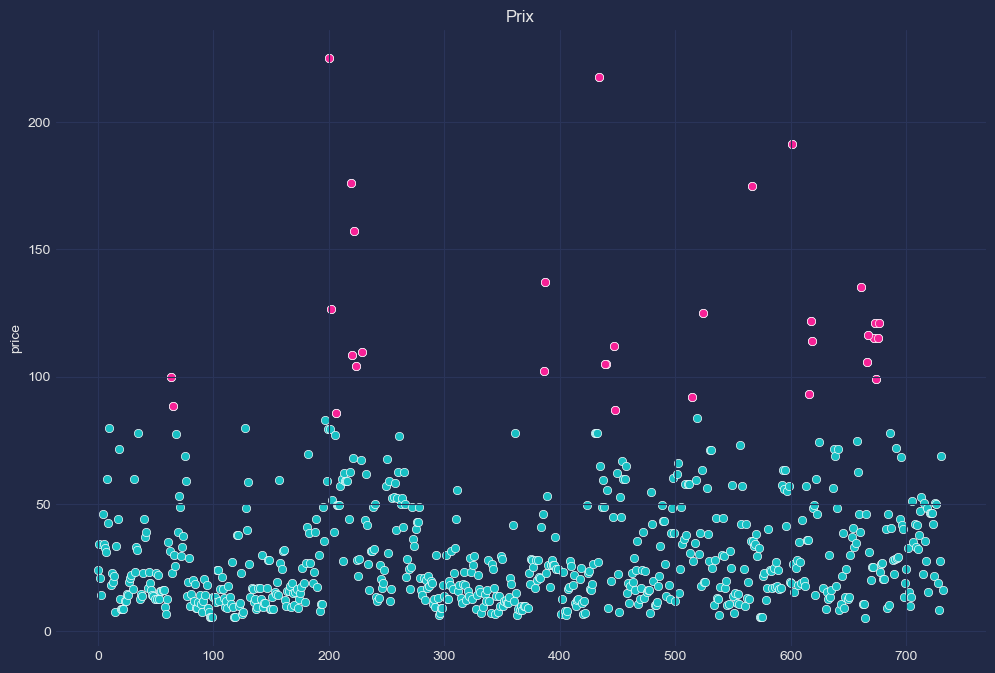

In [93]:
plt.figure(figsize=(12,8))

ax = sns.scatterplot(data=df_central_online["price"],sizes=(20, 2000))
ax = sns.scatterplot(data=df_outlier["price"],sizes=(20, 2000))
ax.set(title="Prix", axisbelow=False)
plt.show()

En conclusion générale, après avoir comparé les prix des 5 valeurs les plus hautes avec les prix pratiqués par la concurrence, on peut affirmer que nous n'avons pas ici à faire à des valeurs aberrantes ou des erreurs de frappe dans les prix.

Il s'agirait plutôt de produits qu'on pourrait catégoriser comme haut de gamme, en effet la disparité des prix pour certaines catégories de produits est très importante.
